In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split   // to split our data into train and test sets where feature variables are
 //given as input in the method
from sklearn.feature_extraction.text import TfidfVectorizer  //Convert a collection of raw documents to a matrix of TF-IDF 
  //features.
from sklearn.linear_model import PassiveAggressiveClassifier  //classification tasks
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('valid.csv')
print(df.head())

                                           Statement  Label
0  We have less Americans working now than in the...  FALSE
1  When Obama was sworn into office, he DID NOT u...  FALSE
2  Says Having organizations parading as being so...  FALSE
3     Says nearly half of Oregons children are poor.   TRUE
4  On attacks by Republicans that various program...   TRUE


In [53]:
df = df.dropna()


X_train, X_test, y_train, y_test = train_test_split(df['Statement'], df['Label'], test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


pac = PassiveAggressiveClassifier(max_iter=50)


pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test)

Accuracy: 91.44%


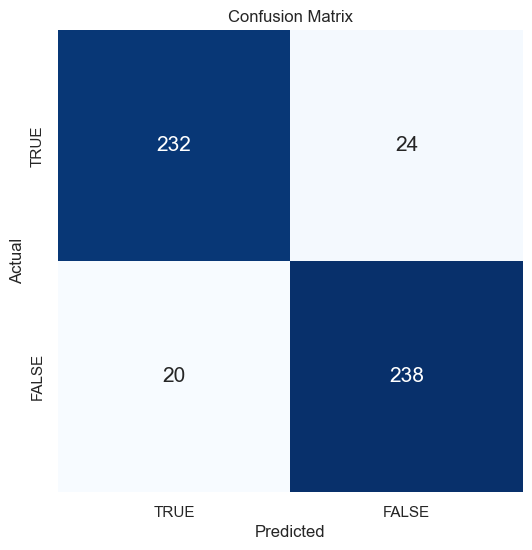

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['TRUE', 'FALSE'], yticklabels=['TRUE', 'FALSE'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

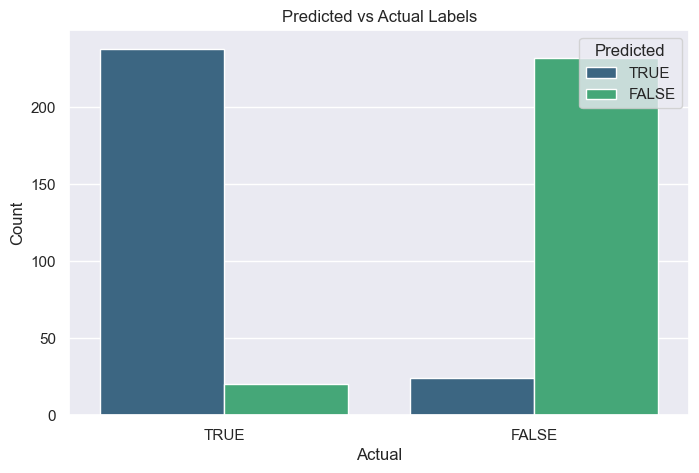

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test, hue=y_pred, palette='viridis')
plt.title('Predicted vs Actual Labels')
plt.xlabel('Actual')
plt.ylabel('Count')
plt.legend(title='Predicted', loc='upper right')
plt.show()